# Functions and Example

In [ ]:
import cv2
import numpy as np
import pandas as pd
import random
import glob
import csv
import keras
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def tiles_images(img, pieces):
  img_width = img_height = img.shape[1] // pieces

  tiles_img = [img[x:x+img_height,y:y+img_width]
             for x in range(0,img.shape[0], img_height)
             for y in range(0,img.shape[1],img_width)
            ]

  new_tiles = []

  for img in tiles_img:
    if img.shape[0] == img_width and  img.shape[1] == img_height:
      new_tiles.append(img)

  return new_tiles

In [ ]:
def group_images(images, shuffle_arr, pieces=4):
  new_img = []

  shuffle_tiles =  [images[i] for i in shuffle_arr]

  for i in range(pieces):
    new_img.append(np.concatenate(shuffle_tiles[i*pieces:(i+1)*pieces], axis=1))

  new_img = np.concatenate(new_img, axis=0)
  return new_img

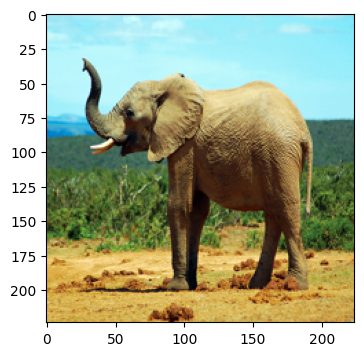

In [ ]:
image = cv2.imread('/content/drive/My Drive/668Project/mammals224/elephant (76).png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.subplots(figsize=(4,4))
plt.imshow(image)

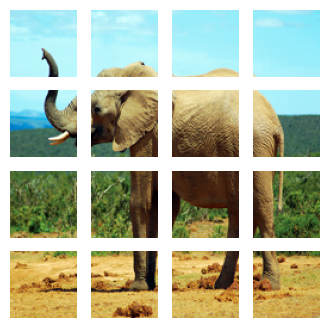

In [ ]:
pieces = 4     # number pieces in one row/column
tiles = tiles_images(image, pieces)

fig, ax = plt.subplots(pieces, pieces, figsize=(4, 4))

for i, idx in enumerate(range(pieces**2)):
  plt.subplot(pieces, pieces, i+1)
  plt.imshow(tiles[idx])
  plt.axis("off")

In [ ]:
shuffle_arr = np.random.permutation(len(tiles))

In [ ]:
shuffle_arr

array([ 1,  7, 15,  6,  2,  8, 10, 12, 11,  0,  4,  5,  3, 14, 13,  9])

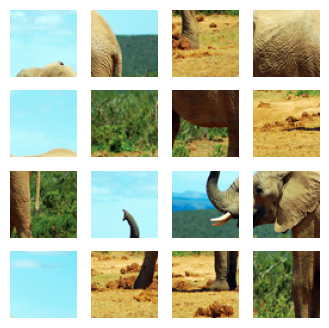

In [ ]:
fig, ax = plt.subplots(pieces, pieces, figsize=(4, 4))

for i, idx in enumerate(shuffle_arr):
  plt.subplot(pieces, pieces, i+1)
  plt.imshow(tiles[idx])
  plt.axis("off")

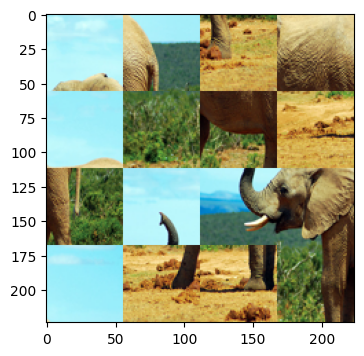

In [ ]:
shuffle_img = group_images(tiles, shuffle_arr)

plt.subplots(figsize=(4, 4))
plt.imshow(shuffle_img)

# Create Datasets

## Randomly Select 110 images

In [ ]:
import os
import random
import shutil

def select_and_copy_images(src_folder, dest_folder, num_images):
    # Get a list of all files in the source folder
    all_images = os.listdir(src_folder)

    selected_images = random.sample(all_images, num_images)

    os.makedirs(dest_folder, exist_ok=True)

    for image in selected_images:
        src_path = os.path.join(src_folder, image)
        dest_path = os.path.join(dest_folder, image)
        shutil.copy(src_path, dest_path)

if __name__ == "__main__":
    source_folder = '/content/drive/My Drive/668Project/mammals224/'
    destination_folder = '/content/drive/My Drive/668Project/correct/'
    num_images_to_select = 110


    select_and_copy_images(source_folder, destination_folder, num_images_to_select)

    print(f"{num_images_to_select} images randomly selected and copied to {destination_folder}.")

110 images randomly selected and copied to /content/drive/My Drive/668Project/correct/.


In [ ]:
correct_image_path = "/content/drive/My Drive/668Project/correct/*"
correct_image = [cv2.imread(file) for file in glob.glob(correct_image_path)]

## 2x2

### Train

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'train'            #change for test, train and validation data
X_path = "puzzle_2x2/"+data_type+"/"

!mkdir puzzle_2x2             #create directory
!mkdir {X_path}

n = 4 if data_type=='train' else 1        #for train dataset create 4x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_2x2/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

### Test

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'test'            #change for test, train and validation data
X_path = "puzzle_2x2/"+data_type+"/"

!mkdir puzzle_2x2             #create directory
!mkdir {X_path}

n = 4 if data_type=='train' else 1        #for train dataset create 4x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_2x2/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

mkdir: cannot create directory ‘puzzle_2x2’: File exists


### Validation

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'valid'            #change for test, train and validation data
X_path = "puzzle_2x2/"+data_type+"/"

!mkdir puzzle_2x2             #create directory
!mkdir {X_path}

n = 4 if data_type=='train' else 1        #for train dataset create 4x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_2x2/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

mkdir: cannot create directory ‘puzzle_2x2’: File exists


## 4x4

### Train

In [ ]:
X, Y = [], []

pieces = 4   # number pieces in one row/column

data_type = 'train'            #change for test, train and validation data
X_path = "puzzle_4x4/"+data_type+"/"

!mkdir puzzle_4x4             #create directory
!mkdir {X_path}

n = 7 if data_type=='train' else 1        #for train dataset create 7x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_4x4/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

### Test

In [ ]:
X, Y = [], []

pieces = 4   # number pieces in one row/column

data_type = 'test'            #change for test, train and validation data
X_path = "puzzle_4x4/"+data_type+"/"

!mkdir puzzle_4x4             #create directory
!mkdir {X_path}

n = 7 if data_type=='train' else 1        #for train dataset create 7x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_4x4/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

mkdir: cannot create directory ‘puzzle_4x4’: File exists


### Validation

In [ ]:
X, Y = [], []

pieces = 4   # number pieces in one row/column

data_type = 'valid'            #change for test, train and validation data
X_path = "puzzle_4x4/"+data_type+"/"

!mkdir puzzle_4x4             #create directory
!mkdir {X_path}

n = 7 if data_type=='train' else 1        #for train dataset create 7x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_4x4/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

mkdir: cannot create directory ‘puzzle_4x4’: File exists


## 8x8

### Train

In [ ]:
X, Y = [], []

pieces = 8   # number pieces in one row/column

data_type = 'train'            #change for test, train and validation data
X_path = "puzzle_8x8/"+data_type+"/"

!mkdir puzzle_8x8             #create directory
!mkdir {X_path}

n = 10 if data_type=='train' else 1        #for train dataset create 10x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_8x8/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

### Test

In [ ]:
X, Y = [], []

pieces = 8   # number pieces in one row/column

data_type = 'test'            #change for test, train and validation data
X_path = "puzzle_8x8/"+data_type+"/"

!mkdir puzzle_8x8             #create directory
!mkdir {X_path}

n = 10 if data_type=='train' else 1        #for train dataset create 10x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_8x8/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

mkdir: cannot create directory ‘puzzle_8x8’: File exists


### Validation

In [ ]:
X, Y = [], []

pieces = 8   # number pieces in one row/column

data_type = 'valid'            #change for test, train and validation data
X_path = "puzzle_8x8/"+data_type+"/"

!mkdir puzzle_8x8             #create directory
!mkdir {X_path}

n = 10 if data_type=='train' else 1        #for train dataset create 10x images

for j in range(n):
  for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i+j*110}.jpg"
    cv2.imwrite(path, group_img)

with open("puzzle_8x8/"+data_type+'.csv', 'w') as file:
  writer = csv.writer(file)
  head = [i for i in range(pieces**2)]
  writer.writerow(head)
  writer.writerows(Y)

mkdir: cannot create directory ‘puzzle_8x8’: File exists


## Our Method: splitting the data in advance

### 70/30

In [ ]:
from sklearn.model_selection import train_test_split

original_dataset_path = "/content/drive/MyDrive/668Project/mammals224/"

output_path = "/content/drive/MyDrive/668Project/7030/correct/"

# Create directories
train_path = os.path.join(output_path, "train")
test_path = os.path.join(output_path, "test")
valid_path = os.path.join(output_path, "valid")

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(valid_path, exist_ok=True)

all_images = [file for file in os.listdir(original_dataset_path) if file.endswith(('.jpg', '.png', '.jpeg'))]

train_images, test_val_images = train_test_split(all_images, test_size=0.3, random_state=42)
test_images, validation_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

# Move to folders
for image in train_images:
    src_path = os.path.join(original_dataset_path, image)
    dest_path = os.path.join(train_path, image)
    shutil.copy(src_path, dest_path)

for image in test_images:
    src_path = os.path.join(original_dataset_path, image)
    dest_path = os.path.join(test_path, image)
    shutil.copy(src_path, dest_path)

for image in validation_images:
    src_path = os.path.join(original_dataset_path, image)
    dest_path = os.path.join(valid_path, image)
    shutil.copy(src_path, dest_path)

Train

In [ ]:
correct_image_path = "/content/drive/My Drive/668Project/7030/correct/train/*"
correct_image = [cv2.imread(file) for file in glob.glob(correct_image_path)]

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'train'            #change for test, train and validation data
X_path = "puzzle_7030/"+data_type+"/"

!mkdir puzzle_7030             #create directory
!mkdir {X_path}

for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i}.jpg"  # Simplified file path
    cv2.imwrite(path, group_img)

with open("puzzle_7030/"+data_type+'.csv', 'w') as file:
    writer = csv.writer(file)
    head = [i for i in range(pieces**2)]
    writer.writerow(head)
    writer.writerows(Y)

Test

In [ ]:
correct_image_path = "/content/drive/My Drive/668Project/7030/correct/test/*"
correct_image = [cv2.imread(file) for file in glob.glob(correct_image_path)]

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'test'            #change for test, train and validation data
X_path = "puzzle_7030/"+data_type+"/"

!mkdir puzzle_7030             #create directory
!mkdir {X_path}

for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i}.jpg"  # Simplified file path
    cv2.imwrite(path, group_img)

with open("puzzle_7030/"+data_type+'.csv', 'w') as file:
    writer = csv.writer(file)
    head = [i for i in range(pieces**2)]
    writer.writerow(head)
    writer.writerows(Y)

Validation

In [ ]:
correct_image_path = "/content/drive/My Drive/668Project/7030/correct/valid/*"
correct_image = [cv2.imread(file) for file in glob.glob(correct_image_path)]

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'valid'            #change for test, train and validation data
X_path = "puzzle_7030/"+data_type+"/"

!mkdir puzzle_7030             #create directory
!mkdir {X_path}

for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i}.jpg"  # Simplified file path
    cv2.imwrite(path, group_img)

with open("puzzle_7030/"+data_type+'.csv', 'w') as file:
    writer = csv.writer(file)
    head = [i for i in range(pieces**2)]
    writer.writerow(head)
    writer.writerows(Y)

### 80/20

In [ ]:
from sklearn.model_selection import train_test_split

original_dataset_path = "/content/drive/MyDrive/668Project/mammals224/"

output_path = "/content/drive/MyDrive/668Project/8020/correct/"

# Create directories
train_path = os.path.join(output_path, "train")
test_path = os.path.join(output_path, "test")
valid_path = os.path.join(output_path, "valid")

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(valid_path, exist_ok=True)

all_images = [file for file in os.listdir(original_dataset_path) if file.endswith(('.jpg', '.png', '.jpeg'))]

train_images, test_val_images = train_test_split(all_images, test_size=0.2, random_state=42)
test_images, validation_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

# Move to folders
for image in train_images:
    src_path = os.path.join(original_dataset_path, image)
    dest_path = os.path.join(train_path, image)
    shutil.copy(src_path, dest_path)

for image in test_images:
    src_path = os.path.join(original_dataset_path, image)
    dest_path = os.path.join(test_path, image)
    shutil.copy(src_path, dest_path)

for image in validation_images:
    src_path = os.path.join(original_dataset_path, image)
    dest_path = os.path.join(valid_path, image)
    shutil.copy(src_path, dest_path)

Train

In [ ]:
correct_image_path = "/content/drive/My Drive/668Project/8020/correct/train/*"
correct_image = [cv2.imread(file) for file in glob.glob(correct_image_path)]

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'train'            #change for test, train and validation data
X_path = "puzzle_8020/"+data_type+"/"

!mkdir puzzle_8020             #create directory
!mkdir {X_path}

for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i}.jpg"  # Simplified file path
    cv2.imwrite(path, group_img)

with open("puzzle_8020/"+data_type+'.csv', 'w') as file:
    writer = csv.writer(file)
    head = [i for i in range(pieces**2)]
    writer.writerow(head)
    writer.writerows(Y)

Test

In [ ]:
correct_image_path = "/content/drive/My Drive/668Project/8020/correct/test/*"
correct_image = [cv2.imread(file) for file in glob.glob(correct_image_path)]

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'test'            #change for test, train and validation data
X_path = "puzzle_8020/"+data_type+"/"

!mkdir puzzle_8020             #create directory
!mkdir {X_path}

for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i}.jpg"  # Simplified file path
    cv2.imwrite(path, group_img)

with open("puzzle_8020/"+data_type+'.csv', 'w') as file:
    writer = csv.writer(file)
    head = [i for i in range(pieces**2)]
    writer.writerow(head)
    writer.writerows(Y)

mkdir: cannot create directory ‘puzzle_8020’: File exists


Validation

In [ ]:
correct_image_path = "/content/drive/My Drive/668Project/8020/correct/valid/*"
correct_image = [cv2.imread(file) for file in glob.glob(correct_image_path)]

In [ ]:
X, Y = [], []

pieces = 2   # number pieces in one row/column

data_type = 'valid'            #change for test, train and validation data
X_path = "puzzle_8020/"+data_type+"/"

!mkdir puzzle_8020             #create directory
!mkdir {X_path}

for i, img in enumerate(correct_image):
    tiles = tiles_images(img, pieces)

    array = np.random.permutation(len(tiles))
    Y.append(array)

    group_img = group_images(tiles, array, pieces)
    X.append(group_img)

    path = f"{X_path}{i}.jpg"  # Simplified file path
    cv2.imwrite(path, group_img)

with open("puzzle_8020/"+data_type+'.csv', 'w') as file:
    writer = csv.writer(file)
    head = [i for i in range(pieces**2)]
    writer.writerow(head)
    writer.writerows(Y)

mkdir: cannot create directory ‘puzzle_8020’: File exists


## Our Method: modifying the CSV

### 70/30

Test

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
input_file = '/content/drive/My Drive/668Project/puzzle_7030/test.csv'
df = pd.read_csv(input_file, header=None)

# Define a function to convert a single row based on the original order
def convert_row(row):
    original_order = sorted(range(len(row)), key=lambda k: row[k])
    return original_order

# Apply the function to each row in the DataFrame
df_converted = df.apply(convert_row, axis=1, result_type='expand')

# Save the converted DataFrame to a new CSV file
output_file = '/content/drive/My Drive/668Project/puzzle_7030/test1.csv'
df_converted.to_csv(output_file, index=False, header=False)

Train

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
input_file = '/content/drive/My Drive/668Project/puzzle_7030/train.csv'
df = pd.read_csv(input_file, header=None)

# Define a function to convert a single row based on the original order
def convert_row(row):
    original_order = sorted(range(len(row)), key=lambda k: row[k])
    return original_order

# Apply the function to each row in the DataFrame
df_converted = df.apply(convert_row, axis=1, result_type='expand')

# Save the converted DataFrame to a new CSV file
output_file = '/content/drive/My Drive/668Project/puzzle_7030/train1.csv'
df_converted.to_csv(output_file, index=False, header=False)

Validation

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
input_file = '/content/drive/My Drive/668Project/puzzle_7030/valid.csv'
df = pd.read_csv(input_file, header=None)

# Define a function to convert a single row based on the original order
def convert_row(row):
    original_order = sorted(range(len(row)), key=lambda k: row[k])
    return original_order

# Apply the function to each row in the DataFrame
df_converted = df.apply(convert_row, axis=1, result_type='expand')

# Save the converted DataFrame to a new CSV file
output_file = '/content/drive/My Drive/668Project/puzzle_7030/valid1.csv'
df_converted.to_csv(output_file, index=False, header=False)

### 80/20

Test

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
input_file = '/content/drive/My Drive/668Project/puzzle_8020/test.csv'
df = pd.read_csv(input_file, header=None)

# Define a function to convert a single row based on the original order
def convert_row(row):
    original_order = sorted(range(len(row)), key=lambda k: row[k])
    return original_order

# Apply the function to each row in the DataFrame
df_converted = df.apply(convert_row, axis=1, result_type='expand')

# Save the converted DataFrame to a new CSV file
output_file = '/content/drive/My Drive/668Project/puzzle_8020/test1.csv'
df_converted.to_csv(output_file, index=False, header=False)


Train

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
input_file = '/content/drive/My Drive/668Project/puzzle_8020/train.csv'
df = pd.read_csv(input_file, header=None)

# Define a function to convert a single row based on the original order
def convert_row(row):
    original_order = sorted(range(len(row)), key=lambda k: row[k])
    return original_order

# Apply the function to each row in the DataFrame
df_converted = df.apply(convert_row, axis=1, result_type='expand')

# Save the converted DataFrame to a new CSV file
output_file = '/content/drive/My Drive/668Project/puzzle_8020/train1.csv'
df_converted.to_csv(output_file, index=False, header=False)

Validation

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
input_file = '/content/drive/My Drive/668Project/puzzle_8020/valid.csv'
df = pd.read_csv(input_file, header=None)

# Define a function to convert a single row based on the original order
def convert_row(row):
    original_order = sorted(range(len(row)), key=lambda k: row[k])
    return original_order

# Apply the function to each row in the DataFrame
df_converted = df.apply(convert_row, axis=1, result_type='expand')

# Save the converted DataFrame to a new CSV file
output_file = '/content/drive/My Drive/668Project/puzzle_8020/valid1.csv'
df_converted.to_csv(output_file, index=False, header=False)